# SI370 Final Project
# Brian Halperin

The data I am analyzing is a dataset I donwnloaded from Kaggle.com. The data is results for the men's ATP tour date back to January 2000 Our first step will be to import all the packages we are going to be working with.



In [340]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "rafa1.jpg")

In [45]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



# Load up everything that we need...

In [2]:
import requests
import urllib.request
import requests
from bs4 import BeautifulSoup
import json
from monkeylearn import MonkeyLearn
import os.path
import time
import re
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_context("notebook")  # make figures fit
from pylab import rcParams
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from IPython.display import Image
from IPython.core.display import HTML 
import sklearn as sk
import sklearn.cluster as skc
import sklearn.decomposition as skd
import sklearn.manifold as skm
import sklearn.preprocessing as skp
from __future__ import print_function

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import cross_validation

import scipy
import os
import subprocess

from sklearn.tree import DecisionTreeClassifier, export_graphviz



//anaconda/envs/si370/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Great. Now let's import our data and take a look at the first five rows.

In [3]:
tennis_df = pd.read_csv('data.csv', encoding="ISO-8859-1")
tennis_df.head(2)


,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Enqvist T.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have our data in, let's find out what the columns and data describes

Key to results data

ATP = Tournament number (men)

Location = Venue of tournament

Tournament = Name of tournament (including sponsor if relevant)

Data = Date of match (note: prior to 2003 the date shown for all matches played in a single tournament is the start date)

Series = Name of ATP tennis series (Grand Slam, Masters, International or International Gold)

Court = Type of court (outdoors or indoors)

Surface = Type of surface (clay, hard, carpet or grass)

Round = Round of match

Best of = Maximum number of sets playable in match

Winner = Match winner

Loser = Match loser

WRank = ATP Entry ranking of the match winner as of the start of the tournament

LRank = ATP Entry ranking of the match loser as of the start of the tournament

WPts = ATP Entry points of the match winner as of the start of the tournament

LPts = ATP Entry points of the match loser as of the start of the tournament

W1 = Number of games won in 1st set by match winner

L1 = Number of games won in 1st set by match loser

W2 = Number of games won in 2nd set by match winner

L2 = Number of games won in 2nd set by match loser

W3 = Number of games won in 3rd set by match winner

L3 = Number of games won in 3rd set by match loser

W4 = Number of games won in 4th set by match winner

L4 = Number of games won in 4th set by match loser

W5 = Number of games won in 5th set by match winner

L5 = Number of games won in 5th set by match loser

Wsets = Number of sets won by match winner

Lsets = Number of sets won by match loser

Comment = Comment on the match (Completed, won through retirement of loser, or via Walkover)

Key to match betting odds data:



B365W = Bet365 odds of match winner

B365L = Bet365 odds of match loser

B&WW = Bet&Win odds of match winner

B&WL = Bet&Win odds of match loser

CBW = Centrebet odds of match winner

CBL = Centrebet odds of match loser

EXW = Expekt odds of match winner

EXL = Expekt odds of match loser

LBW = Ladbrokes odds of match winner

LBL = Ladbrokes odds of match loser

GBW = Gamebookers odds of match winner

GBL = Gamebookers odds of match loser

IWW = Interwetten odds of match winner

IWL = Interwetten odds of match loser

PSW = Pinnacles Sports odds of match winner

PSL = Pinnacles Sports odds of match loser

SBW = Sportingbet odds of match winner

SBL = Sportingbet odds of match loser

SJW = Stan James odds of match winner

SJL = Stan James odds of match loser

UBW = Unibet odds of match winner

UBL = Unibet odds of match loser

MaxW= Maximum odds of match winner

MaxL= Maximum odds of match loser

AvgW= Average odds of match winner

AvgL= Average odds of match loser


# Initial Data Cleanup

We want to do some initial data cleanup in order to make our dataframe easier to work with. First, lets convert the WRank and LRank to numeric values. 

In [4]:
tennis_df.WRank = pd.to_numeric(tennis_df.WRank, errors ='coerce') #Convert to numeric
tennis_df.LRank = pd.to_numeric(tennis_df.LRank, errors = 'coerce')

Let's also create some new columns with our data. Let's create a column that calculates the difference between the two player's respective ranks. Another column we will create is the total number of sets in one match.

In [5]:
tennis_df['Diff'] =  tennis_df['LRank'] - tennis_df['WRank']  #Create column for difference of ranks
tennis_df['Total Sets'] = tennis_df['Wsets'] + tennis_df['Lsets'] #create column for total sets in match.

In [6]:
tennis_df.head(1)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL,Diff,Total Sets
0,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,2.0


We also have a ton of NaN values that are supposed to represent 0 in the individual games won columns. Let's replace those values with 0's. Moreover, lets create another new column that has the difference in games won from each set. Lastly, we want to create two new dataframes in order to look at grand slams diffrently from non-grand slams.

In [7]:
sets = ['W3','W4','W5','L3','L4','L5']

for row in sets:
    tennis_df[row] = tennis_df[row].fillna(0)

tennis_df['Sets Diff'] = tennis_df['W1']+tennis_df['W2']+tennis_df['W3']+tennis_df['W4']+tennis_df['W5'] - (tennis_df['L1']+tennis_df['L2']+tennis_df['L3']+tennis_df['L4']+tennis_df['L5'])
df_non_GS = tennis_df[~(tennis_df.Series == 'Grand Slam')] #Make a new dataframe for every row where series column isnt "Grand Slam"
df_GS = tennis_df[tennis_df.Series == 'Grand Slam'] #Make a new dataframe for every row where series column is "Grand Slam"

In [8]:
df_GS.head(1)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL,Diff,Total Sets,Sets Diff
155,6,Melbourne,Australian Open,17/01/2000,Grand Slam,Outdoor,Hard,1st Round,5,Agassi A.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,3.0,11.0


In [9]:
df_non_GS.head(1)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL,Diff,Total Sets,Sets Diff
0,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,2.0,6.0


# Surface Analysis
(Inspired by Kaggle)

Are professional tennis players experts when it comes to the court surface? 
Do great tennis players tend to specialize in certain courts or are they just good on all courts?

In order to analyze some of these questions,  lets create a new players data frame, including features for performance on different surfaces. It's important that we start tracking wins and losses records for each player in order to see if they are better or wrose on certain courts. We will do this by iterating through the dataframe and dividing their wins by totol games and getting the percentage of games they win.
Then we will use K-means clustering and examine the outcome with 3 clusters. If players are not "experts", and are simply good, the cluster means in the surface space (Clay, Grass and Hard) would be close to the diagonal line.

In [10]:
winners = np.unique(tennis_df['Winner']) #Returns the sorted unique elements of an array
losers = np.unique(tennis_df['Loser'])
players = np.append(winners,losers)
players_un = np.unique(players)
players_un[500:510] #Array of all players

array(['Hanescu V. ', 'Hank T.', 'Hanley P.', 'Hantschek M.',
       'Hantschk M.', 'Harboe P.', 'Harper-Griffith L.', 'Harrison C.',
       'Harrison R.', 'Harsanyi P.'], dtype=object)

In order to track the amounts of wins and losses for each player, let's create some numpy arrays that will represent the records of each player. Let's then create a Dataframe with the zero arrays and the categories.

In [11]:
#Lets create the arrays for our values for our dataframe. 
Record = np.zeros(len(players_un)) # General record of the player
GrandSlam_record = np.zeros(len(players_un)) # Grand Slam record
Clay_record =  np.zeros(len(players_un)) # Clay Record
Carpet_record = np.zeros(len(players_un)) # Carpet Record
Grass_record = np.zeros(len(players_un)) # Grass Record
Hard_record = np.zeros(len(players_un)) #Hard surface record
Final_Record = np.zeros(len(players_un)) # Fianls Record

In [12]:
# Build the Players Data Frame
d = {'Player_Name': players_un,
     'Record':Record,
     'GrandSlam_record': GrandSlam_record,
     'Clay_record': Clay_record,
     'Carpet_record': Carpet_record,
     'Grass_record':Grass_record,
     'Hard_record':Hard_record,
     'Final_Record':Final_Record}
players_df = pd.DataFrame(data=d)
players_df.head()

,Carpet_record,Clay_record,Final_Record,GrandSlam_record,Grass_record,Hard_record,Player_Name,Record
0,0.0,0.0,0.0,0.0,0.0,0.0,Hajek J.,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,Abdulla M.,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,Abel M.,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,Acasuso J.,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,Adaktusson J.,0.0


Now that we have an empty Dataframe, we can fill in the features we want to see.

In [13]:
# Fill in features values for each feature
for first,second in enumerate(players_df.iterrows()): #Iterate over dataframe index, series
    
    w = len(tennis_df[tennis_df['Winner'] == second[1]['Player_Name']]) #Create variable for W that represents amount of player wins
    l = len(tennis_df[tennis_df['Loser'] == second[1]['Player_Name']]) #Create variable for lossees that represents amount of player losses
    players_df.loc[first,'Total_Games'] = w + l 
    players_df.loc[first,'Record'] = np.true_divide(w,(w+l)) #calculate record


In [14]:
for first,second in enumerate(players_df.iterrows()): 
    #Calculate Grand Slam Record of each player
    new_df = tennis_df[tennis_df.Series == 'Grand Slam'] #Create new dataframe for Grandslam
    w = len(new_df[new_df['Winner'] == second[1]['Player_Name']]) 
    l = len(new_df[new_df['Loser'] == second[1]['Player_Name']])
    players_df.loc[first,'Total_GS_Games'] = w + l
    players_df.loc[first,'GrandSlam_record'] = np.true_divide(w,(w+l))
    

In [15]:
for first,second in enumerate(players_df.iterrows()): 
    #Calculate Clay Record of each player
    new_df = tennis_df[tennis_df.Surface == 'Clay'] #Clay
    w = len(new_df[new_df['Winner'] == second[1]['Player_Name']])
    l = len(new_df[new_df['Loser'] == second[1]['Player_Name']])
    players_df.loc[first,'Total_Clay_Games'] = w + l
    players_df.loc[first,'Clay_record'] = np.true_divide(w,(w+l))
        

In [16]:
for first,second in enumerate(players_df.iterrows()): 
    new_df = tennis_df[tennis_df.Surface == 'Carpet'] #Carpet
    w = len(new_df[new_df['Winner'] == second[1]['Player_Name']])
    l = len(new_df[new_df['Loser'] == second[1]['Player_Name']])
    players_df.loc[first,'Total_Carpet_Games'] = w + l
    players_df.loc[first,'Carpet_record'] = np.true_divide(w,(w+l))

In [17]:
for first,second in enumerate(players_df.iterrows()): 
    new_df = tennis_df[tennis_df.Surface == 'Grass']
    w = len(new_df[new_df['Winner'] == second[1]['Player_Name']])
    l = len(new_df[new_df['Loser'] == second[1]['Player_Name']])
    players_df.loc[first,'Total_Grass_Games'] = w + l
    players_df.loc[first,'Grass_record'] = np.true_divide(w,(w+l))

In [18]:
for first,second in enumerate(players_df.iterrows()):     
    new_df = tennis_df[tennis_df.Surface == 'Hard']
    w = len(new_df[new_df['Winner'] == second[1]['Player_Name']])
    l = len(new_df[new_df['Loser'] == second[1]['Player_Name']])
    players_df.loc[first,'Total_Hard_Games'] = w + l
    players_df.loc[first,'Hard_record'] = np.true_divide(w,(w+l))

In [19]:
for first,second in enumerate(players_df.iterrows()):     
    new_df = tennis_df[tennis_df['Round'] == 'The Final']
    w = len(new_df[new_df['Winner'] == second[1]['Player_Name']])
    l = len(new_df[new_df['Loser'] == second[1]['Player_Name']])
    players_df.loc[first,'Total_final_Games'] = w + l
    players_df.loc[first,'Final_record'] = np.true_divide(w,(w+l))

Ok Great. Now we have data filled in of the players winning percentages on certain surfaces. We also have the total amount of games played on each surface. Now, let's create a new column that will be the difference of the player's records in Grand Slams compared to regular tournaments. Lets also do the same for finals matches compared to regular matches

In [20]:
players_df['Grand_Slam_Diff'] = (players_df['GrandSlam_record'] - players_df['Record'])/(players_df['GrandSlam_record'] + players_df['Record'])
players_df['Finals_diff'] = (players_df['Final_Record'] - players_df['Record'])/(players_df['Final_Record'] + players_df['Record'])
players_df.head()

,Carpet_record,Clay_record,Final_Record,GrandSlam_record,Grass_record,Hard_record,Player_Name,Record,Total_Games,Total_GS_Games,Total_Clay_Games,Total_Carpet_Games,Total_Grass_Games,Total_Hard_Games,Total_final_Games,Final_record,Grand_Slam_Diff,Finals_diff
0,NaN,0.500000,0.0,NaN,NaN,NaN,Hajek J.,0.500000,2.0,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,-1.0
1,NaN,NaN,0.0,NaN,NaN,0.000000,Abdulla M.,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN
2,NaN,0.333333,0.0,0.000000,0.0,0.200000,Abel M.,0.222222,9.0,1.0,3.0,0.0,1.0,5.0,0.0,NaN,-1.000000,-1.0
3,0.333333,0.579399,0.0,0.311111,0.0,0.396226,Acasuso J.,0.504178,359.0,45.0,233.0,12.0,8.0,106.0,11.0,0.272727,-0.236808,-1.0
4,NaN,NaN,0.0,0.000000,NaN,0.000000,Adaktusson J.,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN


Now we can perform KMeans clustering on our data comparing the winning percentages.

In [24]:
from sklearn.cluster import KMeans
over175_players_df = players_df[players_df['Total_Games']>175]#Restrict Dataframe to players who have played more than 175 games.

k_data= {'Clay_record': over175_players_df.Clay_record,
         'Grass_record' :over175_players_df.Grass_record,
         'Hard_record':over175_players_df.Hard_record}

kmeans_df =  pd.DataFrame(data=k_data)

kmeans = KMeans(n_clusters = 3, random_state = 0).fit(kmeans_df)
over175_players_df['label'] = kmeans.labels_
over175_players_df.head() #Different labels indicate different clusters.

,Carpet_record,Clay_record,Final_Record,GrandSlam_record,Grass_record,Hard_record,Player_Name,Record,Total_Games,Total_GS_Games,Total_Clay_Games,Total_Carpet_Games,Total_Grass_Games,Total_Hard_Games,Total_final_Games,Final_record,Grand_Slam_Diff,Finals_diff,label
3,0.333333,0.579399,0.0,0.311111,0.000000,0.396226,Acasuso J.,0.504178,359.0,45.0,233.0,12.0,8.0,106.0,11.0,0.272727,-0.236808,-1.0,2
6,0.714286,0.689655,0.0,0.813084,0.689655,0.783784,Agassi A.,0.759207,353.0,107.0,58.0,7.0,29.0,259.0,25.0,0.640000,0.034267,-1.0,0
24,0.428571,0.656642,0.0,0.583333,0.423077,0.492308,Almagro N.,0.593301,627.0,108.0,399.0,7.0,26.0,195.0,23.0,0.565217,-0.008472,-1.0,1
33,0.625000,0.581818,0.0,0.671875,0.740000,0.579882,Ancic M.,0.611465,314.0,64.0,55.0,40.0,50.0,169.0,11.0,0.272727,0.047073,-1.0,0
37,NaN,0.512821,0.0,0.586667,0.553191,0.585455,Anderson K.,0.567500,400.0,75.0,78.0,0.0,47.0,275.0,11.0,0.272727,0.016606,-1.0,0


We want to be able to show these clusters in different colors so we have to seperate each label.

In [25]:
x1 = np.array(over175_players_df['Clay_record'][over175_players_df['label'] == 0])
y1 = np.array(over175_players_df['Grass_record'][over175_players_df['label'] == 0])
z1 = np.array(over175_players_df['Hard_record'][over175_players_df['label'] == 0])

x2 = np.array(over175_players_df['Clay_record'][over175_players_df['label'] == 1])
y2 = np.array(over175_players_df['Grass_record'][over175_players_df['label'] == 1])
z2 = np.array(over175_players_df['Hard_record'][over175_players_df['label'] == 1])

x3 = np.array(over175_players_df['Clay_record'][over175_players_df['label'] == 2])
y3 = np.array(over175_players_df['Grass_record'][over175_players_df['label'] == 2])
z3 = np.array(over175_players_df['Hard_record'][over175_players_df['label'] == 2])


In [26]:
x1, x2, x3 #using for KMeans

(array([ 0.68965517,  0.58181818,  0.51282051,  0.58928571,  0.63350785,
         0.49367089,  0.61309524,  0.58695652,  0.70879121,  0.69620253,
         0.6025641 ,  0.8125    ,  0.61157025,  0.77186312,  0.48648649,
         0.7060241 ,  0.71986971,  0.45283019,  0.64130435,  0.56363636,
         0.67619048,  0.5959596 ,  0.61073826,  0.58441558,  0.66101695,
         0.53932584,  0.53448276,  0.47826087,  0.56756757,  0.72413793,
         0.56050955,  0.50678733,  0.63473054,  0.70486111,  0.68992248,
         0.90932642,  0.65445026,  0.71428571,  0.56164384,  0.61290323,
         0.63013699,  0.68219178,  0.69791667,  0.62411348,  0.51666667,
         0.60891089,  0.59166667,  0.57055215,  0.71084337,  0.62264151,
         0.62337662,  0.66666667,  0.52320675]),
 array([ 0.6566416 ,  0.53768844,  0.40909091,  0.34090909,  0.4       ,
         0.25      ,  0.55555556,  0.43269231,  0.32      ,  0.27906977,
         0.43434343,  0.29787234,  0.16666667,  0.52      ,  0.3875    ,
  

Since we have three arrays, let's use a 3D-Graph in order to plot our clusters.

In [27]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

trace1 = go.Scatter3d(
    x=x1,
    y=y1,
    z=z1,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(75, 244, 66)',
            width=0.5
        ),
        opacity=0.8
    )
)

trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        color='rgb(193, 16, 28)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)

trace3 = go.Scatter3d(
    x=x3,
    y=y3,
    z=z3,
    mode='markers',
    marker=dict(
        color='rgb((17, 193, 49)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(17, 193, 49)',
            width=1
        ),
        opacity=0.9
    )
)

data = [trace1, trace2,trace3]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')


High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~bhalp/0 or inside your plot.ly account where it is named 'simple-3d-scatter'


The Blue cluster represents the players who excel on all courts. The yellow cluster indicates players who have a prefrence for Clay. The red cluster represents players with a grass preference. This graph is interactive so you can pan around, zoom in, and remove certain clusters to get a better look at it. Let's look at this on three diffrent 2D surfaces.


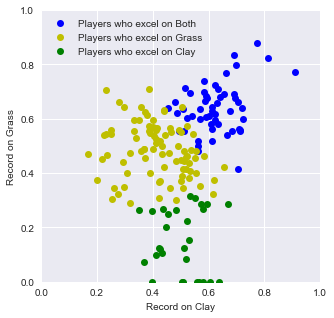

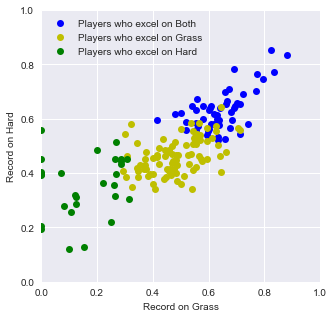

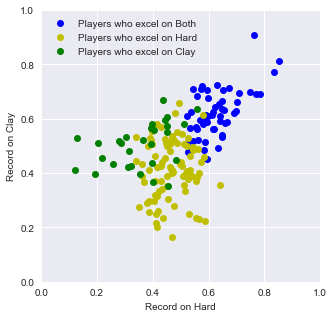

In [31]:
plt.figure(figsize=(5,5))
plt.hold(True)
plt.plot(x1,y1,'bo')
plt.plot(x2,y2,'yo')
plt.plot(x3,y3,'go')
plt.xlabel('Record on Clay',fontsize = 10)
plt.ylabel('Record on Grass',fontsize = 10)
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['Players who excel on Both', 'Players who excel on Grass', 'Players who excel on Clay'], loc = 2, fontsize = 10)

plt.figure(figsize=(5,5))
plt.hold(True)
plt.plot(y1,z1,'bo')
plt.plot(y2,z2,'yo')
plt.plot(y3,z3,'go')
plt.xlabel('Record on Grass', fontsize = 10)
plt.ylabel('Record on Hard',fontsize = 10)
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['Players who excel on Both', 'Players who excel on Grass', 'Players who excel on Hard'], loc = 2, fontsize = 10)

plt.figure(figsize=(5,5))
plt.hold(True)
plt.plot(z1,x1,'bo')
plt.plot(z2,x2, 'yo')
plt.plot(z3,x3,'go')
plt.xlabel('Record on Hard',fontsize = 10)
plt.ylabel('Record on Clay',fontsize = 10)
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['Players who excel on Both', 'Players who excel on Hard', 'Players who excel on Clay'], loc = 2, fontsize = 10)


We divided the players data into 3 clusters. The X1,Y1,Z1 labels are for the best players who excel on both. They are colored in Blue. The Blue cluster is has higher values than the yellow and the green clusters in all surfaces. This means the Blue cluster is well balanced. The players in this cluster are the players who excel on both surfaces and are indiffrent to either types. This cluster will include the best players such as Andy Murray and Novak Djokovic. These players still have prefrences to the type of court they plan on, however, it is not the most important aspect of the game to them.

The yellow cluster with labels X2,Y2,Z3 represents players who have a slight grass preference. Their winning percentage is worse compared to the blue cluster and it's clear that they are much less skilled.

The Green Cluster with labels X3,Y3,Z3 is representitive of players who have a clay prefrence. They are better then glass players on clay, and are worse on hard surfaces and grass.



Let's take at two at of my favorite tennis players and how they compare on different surfaces.


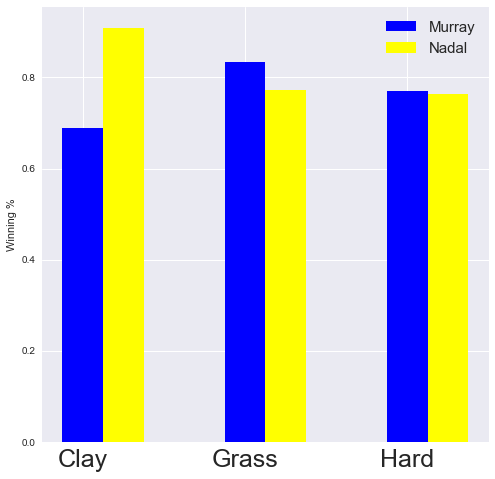

In [478]:
murray = np.zeros(3) #Create empty array
murray[0] = over175_players_df['Clay_record'][over175_players_df['Player_Name'] == 'Murray A.'] #Fill in clay record
murray[1] = over175_players_df['Grass_record'][over175_players_df['Player_Name'] == 'Murray A.'] #Fill in Grass Record
murray[2] = over175_players_df['Hard_record'][over175_players_df['Player_Name'] == 'Murray A.'] #Fill in Hard Record

nadal = np.zeros(3)
nadal[0] = over175_players_df['Clay_record'][over175_players_df['Player_Name'] == 'Nadal R.']
nadal[1] = over175_players_df['Grass_record'][over175_players_df['Player_Name'] == 'Nadal R.']
nadal[2] = over175_players_df['Hard_record'][over175_players_df['Player_Name'] == 'Nadal R.']

plt.figure(figsize = (8,8))
plt.hold(True)
plt.bar([.5,2.5,4.5],murray, color = 'blue' , width = 0.5)
plt.bar([1,3,5],nadal, color = 'yellow', width = 0.5)
plt.xlim(0,5.5)
plt.xticks([0.5,2.5,4.5], ['Clay','Grass','Hard'], fontsize = 25)
plt.legend(['Murray','Nadal'], fontsize = 15)
plt.ylabel('Winning %')
plt.show()

Nadal's dominance on clay is clearly shown as he wins almost 90% of his games on Clay. Murray shows a more versatile distribution - and a special liking for Grass


# Correlation and Regression

Let's find out if there is a correlation between player's records on each surface. In order to do this, let's restrict the dataframes to just the winning percentages.

In [127]:

win_pct = pd.DataFrame(over175_players_df, columns = ['Grass_record','Hard_record','Clay_record'])

In [128]:
win_pct.head()

,Grass_record,Hard_record,Clay_record
3,0.000000,0.396226,0.579399
6,0.689655,0.783784,0.689655
24,0.423077,0.492308,0.656642
33,0.740000,0.579882,0.581818
37,0.553191,0.585455,0.512821


Let's check the fourplots of each of these columns in order to look at the distrubutions of our data.

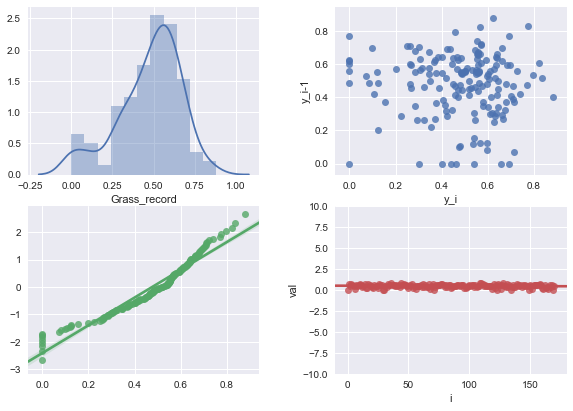

In [129]:
def multiplePlots( series ):
    
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=1.0)

    # Histogram
    sns.distplot(series, ax=axs[0,0])
    
    # Lag plot
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current,lag,fit_reg=False, ax=axs[0,1])
    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")
    
    # QQ plot
    qntls, xr = stats.probplot(series, fit=False)
    sns.regplot(xr,qntls, ax=axs[1,0])
    
    # Run sequence
    ax = sns.regplot(np.arange(len(series)),series, ax=axs[1,1])
    ax.set_ylim(-10,10)
    ax.set_ylabel("val")
    ax.set_xlabel("i")

multiplePlots(win_pct.Grass_record )

# The histogram looks fairly normal, bit of a long tail.
# There is no apparent structure in the lag plot.
# The QQ plot is normal for most but some skewness.
# fairly equal dispersion around mean, mean fairly flat.

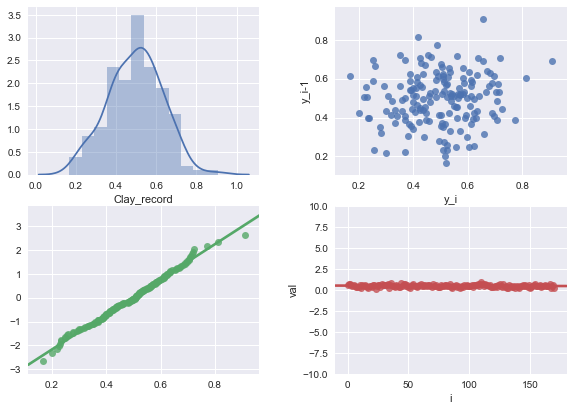

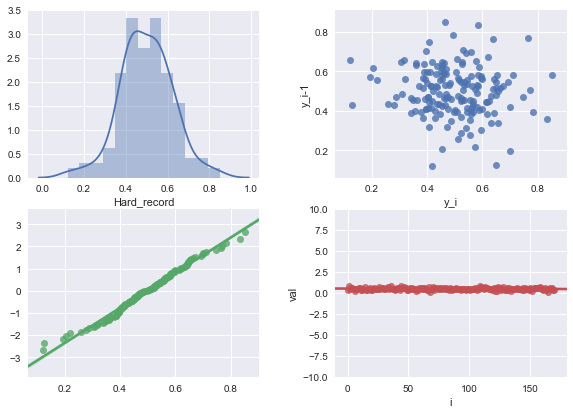

In [131]:
multiplePlots(win_pct.Clay_record )
multiplePlots(win_pct.Hard_record )


Our data looks to have a normal distribution. The histogram and the QQ-plot show normality of the data. The Lag plot and Run plot also show normal data.

In [134]:
cormat = win_pct.corr(method='spearman')
cormat

,Grass_record,Hard_record,Clay_record
Grass_record,1.000000,0.763610,0.255096
Hard_record,0.763610,1.000000,0.510604
Clay_record,0.255096,0.510604,1.000000


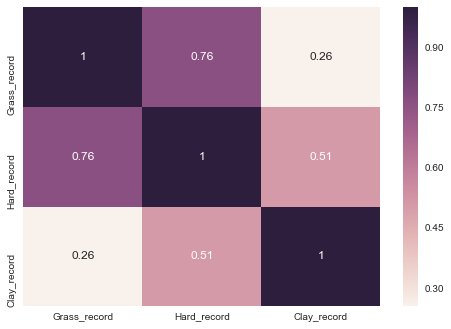

In [136]:
sns.heatmap(cormat,annot=True)

Let's generate a SPLOM to see linear relationship

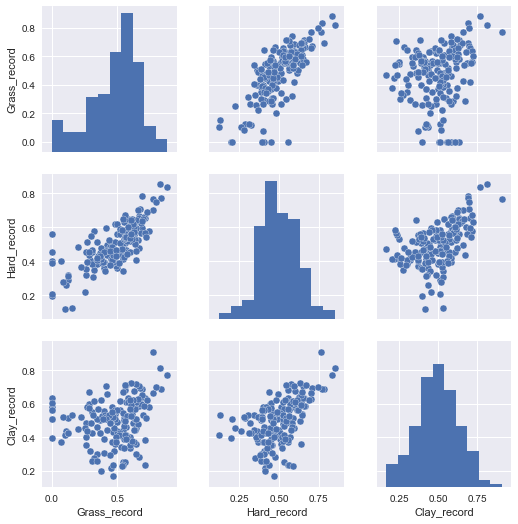

In [137]:
# Generate a splom
sns.pairplot(win_pct)

# There is a strong positive correlation between Grass Record and Hard Record.
# There is a slight positive correlation between Grass Recod and Clay Record.
# There is a slight positive correlation between Hard Record and Clay Record.

Let's build a simple regression model for Grass record and Hard Record becuase the correlation seemed high.

In [492]:
slope, intercept, r, p, serr = stats.linregress(over175_players_df.Clay_record,
                                                over175_players_df.Grass_record)
print("slope=",slope)
print("intercept=",intercept)
print("r value=",r)
print("p value=",p)
print("standard error",serr)

m = smf.ols('Grass_record ~ Hard_record', data = over175_players_df).fit()
m.summary()

slope= 0.295981814148
intercept= 0.329848694411
r value= 0.20824890126
p value= 0.00627096014106
standard error 0.106932937814


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Grass_record   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sun, 16 Apr 2017   Prob (F-statistic):           5.06e-32
Time:                        19:06:15   Log-Likelihood:                 111.78
No. Observations:                 171   AIC:                            -219.6
Df Residuals:                     169   BIC:                            -213.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.0952      0.040     -2.374      0.019        -0.174    -0.016
Hard_record     1.1487      0.078     14.694      0.000         0.994     1.303
==============================================================================
Omnibus:                       45.916   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.861
Skew:                          -1.223   Prob(JB):                     2.52e-21
Kurtosis:                       5.708   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [493]:
expected = (slope*over175_players_df.Grass_record+intercept)
residuals = over175_players_df.Hard_record - expected

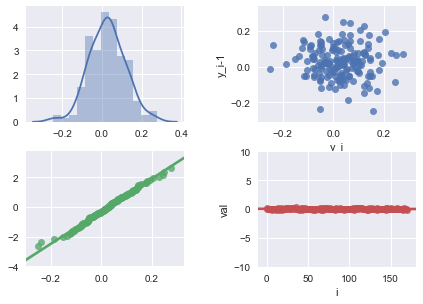

In [494]:
multiplePlots( residuals )

# The histogram looks fairly normal, bit of a long tail.
# There is no apparent structure in the lag plot.
# The QQ plot is normal for most but some skewness.
# fairly equal dispersion around mean, mean fairly flat.

# Comparing Upsets in Tournament Type

There is a difference between Grand Slam Tournaments and Regular Tournaments. This difference is that Grand Slam sets are best of 5 rather than best of 3. I believe this will lead to a less likely chance that there are upsets in Grand Slam Tournaments.

In [396]:
all_upset = len(tennis_df[tennis_df['Diff'] < 0])/ len(tennis_df) * 100
print(all_upset)

34.23004372802881


Upsets occur 34% of the time in all tournaments.

In [397]:
gf_upset = len(df_GS[df_GS['Diff'] < 0])/ len(df_GS) * 100
print(gf_upset)

28.045391384900416


Upsets occur 28% of the time in grand-slam tournaments. Our hypothesis was right.

In [398]:
non_gf_upset = len(df_non_GS[df_non_GS['Diff'] < 0])/ len(df_non_GS) * 100
print(non_gf_upset)

35.63499579124579


Upsets occur about 35% of the time in non-grand slam tournaments.

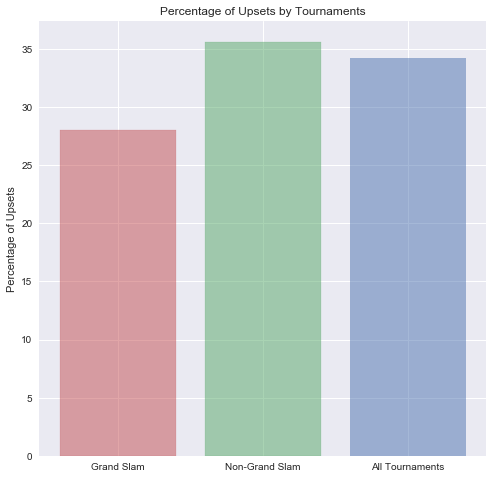

In [484]:
objects = ('Grand Slam', 'Non-Grand Slam', 'All Tournaments')
y_pos = np.arange(len(objects))
performance = [gf_upset,non_gf_upset,all_upset]
plt.figure(figsize= (8,8))
plt.hold(True)
a = plt.bar(y_pos, performance, align='center', alpha=0.5)
a[0].set_color('R')
a[1].set_color('G')
plt.xticks(y_pos, objects)
plt.ylabel('Percentage of Upsets')
plt.title('Percentage of Upsets by Tournaments')
 
plt.show()

In [452]:
df_non_GS.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,CBW,CBL,GBW,GBL,IWW,IWL,SBW,SBL,B365W,B365L,B&WW,B&WL,EXW,EXL,PSW,PSL,WPts,LPts,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL,Diff,Diff_Round_10,Total Sets,Sets Diff
0,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,63.0,77.0,6.0,4.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,10.0,2.0,6.0
1,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Enqvist T.,Clement A.,5.0,56.0,6.0,3.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,50.0,2.0,6.0
2,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,40.0,655.0,6.0,7.0,7.0,5.0,6.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,615.0,620.0,3.0,4.0
3,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Federer R.,Knippschild J.,65.0,87.0,6.0,1.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,20.0,2.0,7.0
4,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,81.0,198.0,7.0,6.0,5.0,7.0,6.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,120.0,3.0,1.0


# Sports Betting Anaylsis

I like betting on sports which is generally a bad idea. Over time, according to conventional theories, you will always lose money. I want to see if this is true. Is there really a difference between betting on 10 matches, 100 matches or 1000 matches in terms of how much money you win or lose? (This question was inspired by Kaggle contributors)

Let's see if we can track how much money one would accumulate by betting on favorites or underdogs in Grand Slams vs Non-Grand Slams. If you're not familar with sports betting, each tennis player is assigned odds. The favorites are always -, while the underdogs are always +. For example, if Federer were playing a standard college amateur, Federer would be -10000, while the amateur would be +7000. These numbers correspond to a 100 dollar bet on each player. E.G, If you were to be 100 dollars on the amateur, you would win 7000 dollars if he won. You would need to bet 10000 dollars on Federer to win 100 dollars if Federer won (which is more likely).

Our odds are represented in the DataFrame as AvgW and AvgL which indicate the average odds for the favorite and underdog. Therefore, we can represent the money won or lossed on each match by using these odds. 

For example, if we look at the first row. We see that the avgW and avgL for the first match were 1.52 and 2.46 which would translate to -152 and +246 in betting odds. Therefore, since the underdog won this match we can say if you bet a dollar on the underdog you would be +2.46, while if you bet on the favorite you would be -1.

We can do this for every row and keep track of our totals in order to get a better idea of how much money we can make on each tournament type

In [53]:
df_non_GS = df_non_GS[~np.isnan(df_non_GS['AvgW'])] #Drop all null values for AvgW (average winner's odds for dollar bet)
fav_money = 0 #Accumuate money for favorites
under_money = 0 #Accumulate money for underdogs
favorite = [] #We want to keep track of all the values so we can plot. Let's make a list and append our new balance everytime.
underdog = [] #Same concept with underdog balance
#iterate through dataframe
for row in df_non_GS.iterrows():
    #If favorite wins
    if row[1]['Diff']>0:
        fav_money = fav_money + row[1]['AvgW']- 1 #If you bet a dollar on favorite and it wins, you win AvgW - 1. 
        under_money = under_money - 1  #if you bet a dollar on underdog and it loses, you lose a dollar on the bet.
    #If underdog wins    
    else:
        fav_money = fav_money - 1 #If you bet a dollar on favorite and it loses, you lose a dollar.
        under_money = under_money + row[1]['AvgW'] -1  #If you bet a dollar on underdog, you win odds of winner.
        
    favorite.append(fav_money) #Append balance on to list of balances. 
    underdog.append(under_money)


In [54]:
fav_array = np.array(favorite)
under_array = np.array(underdog)


In [55]:
df_GS = df_GS[~np.isnan(df_GS['AvgW'])]
gs_fav = 0
gs_under = 0
gs_fav_bal = []
gs_under_bal = []
for row in df_GS.iterrows():
    if row[1].Diff>0:
        gs_fav = gs_fav + row[1]['AvgW'] - 1
        gs_under = gs_under - 1 
    else:
        gs_fav = gs_fav - 1
        gs_under = gs_under + row[1]['AvgW'] - 1
    gs_fav_bal.append(gs_fav)
    gs_under_bal.append(gs_under)

In [56]:
gs_fav_bal = np.array(gs_fav_bal)
gs_under_bal = np.array(gs_under_bal)

Now that we have our array's of the favorite/underdog balance, we can plot them together. Let's take a look at the first 100 matches or our first 100 bets!

In [57]:
fav_100_array = fav_array[0:100]
under_100_array = under_array[0:100]

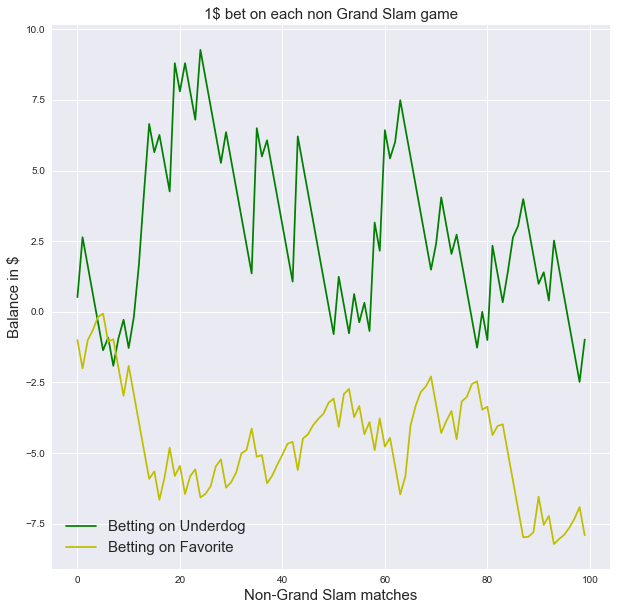

In [58]:
plt.figure(figsize= (10,10))
plt.hold(True)
plt.plot(under_100_array,'g')
plt.plot(fav_100_array,'y')
plt.xlabel('Non-Grand Slam matches', fontsize = 15)
plt.ylabel('Balance in $', fontsize = 15)
plt.title('1$ bet on each non Grand Slam game', fontsize = 15)
plt.legend(['Betting on Underdog', 'Betting on Favorite'], loc = 3, fontsize = 15)
plt.show()

In [59]:
gs_fav100_bal = gs_fav_bal[0:100]
gs_under100_bal = gs_under_bal[0:100]

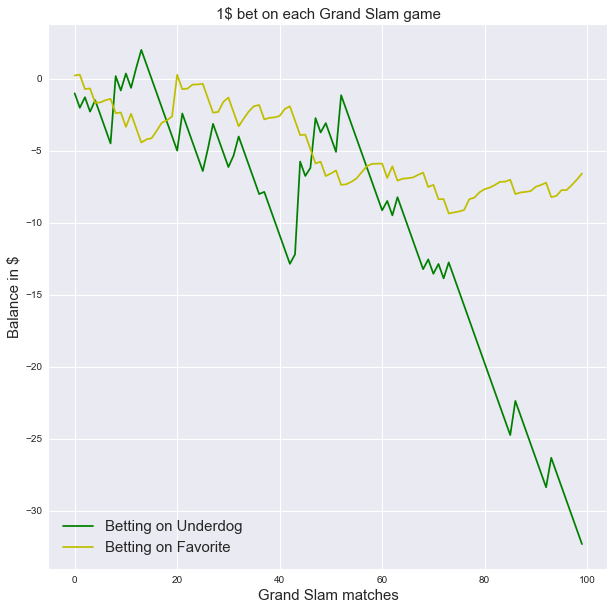

In [60]:
plt.figure(figsize= (10,10))
plt.hold(True)
plt.plot(gs_under100_bal,'g')
plt.plot(gs_fav100_bal,'y')
plt.xlabel('Grand Slam matches', fontsize = 15)
plt.ylabel('Balance in $', fontsize = 15)
plt.title('1$ bet on each Grand Slam game', fontsize = 15)
plt.legend(['Betting on Underdog', 'Betting on Favorite'], loc = 3, fontsize = 15)
plt.show()

Very interesting. In the first 100 bets on each type of match the results are very varied. There are ways that the balance would increase to a positive value, but it is very shortlived. Let's try plotting all the matches from 2000 to see if increasing the number of bets decreases our balance.

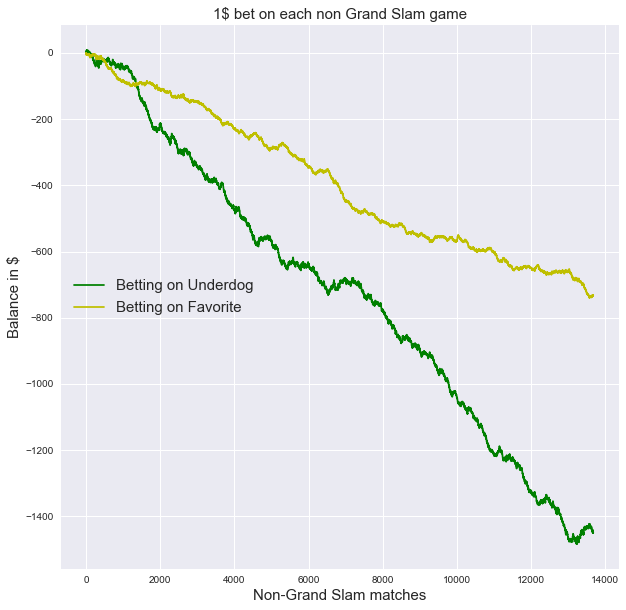

In [61]:
plt.figure(figsize= (10,10))
plt.hold(True)
plt.plot(under_array,'g')
plt.plot(fav_array,'y')
plt.xlabel('Non-Grand Slam matches', fontsize = 15)
plt.ylabel('Balance in $', fontsize = 15)
plt.title('1$ bet on each non Grand Slam game', fontsize = 15)
plt.legend(['Betting on Underdog', 'Betting on Favorite'], loc = 6, fontsize = 15)
plt.show()

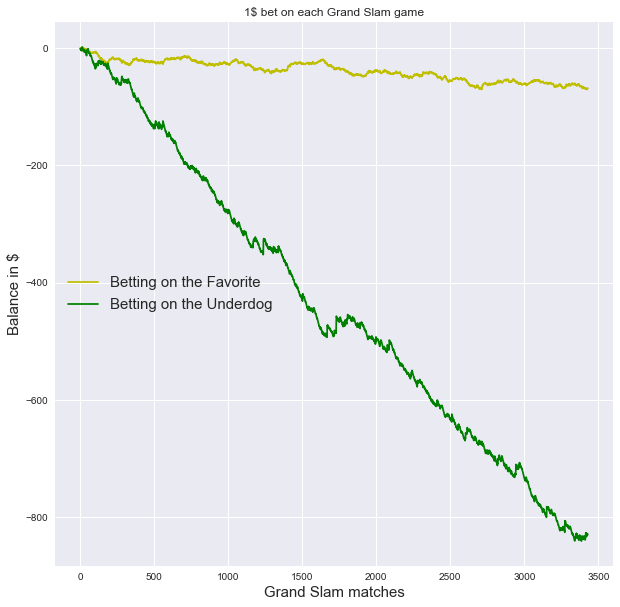

In [62]:
plt.figure(figsize = (10,10))
plt.hold(True)
plt.plot(gs_fav_bal,'y')
plt.plot(gs_under_bal,'g')
plt.plot()
plt.xlabel('Grand Slam matches',fontsize = 15)
plt.ylabel('Balance in $', fontsize = 15)
plt.title('1$ bet on each Grand Slam game')
plt.legend(['Betting on the Favorite', 'Betting on the Underdog'], loc = 6, fontsize = 15)
plt.show()

Wow! When we include all the matches it shows how bad of an idea sports betting is! By betting 1$ on each match, we can visualize why sports betting is so tough. The odds are made so that if you were to bet on 3000 matches, you would always lose money. In Non-Grand Slams, you're pretty likely to lose money either way if you were betting on all favorites or underdogs. In Grand-Slam tournaments, however, you are much less likely to lose an extreme amount of money by betting on favorites. This indicates what we thought to be true in the begining: By increasing the amount of sets to 5, it becomes harder to upset the favorite!